<a href="https://colab.research.google.com/github/MohdSharik99/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [335]:
# mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [336]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Section 1
## Exploring the data

In [337]:
#loading the dataset
df =  pd.read_csv('/content/drive/MyDrive/Alma better/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [338]:
# head of the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [339]:
#tail of the dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [340]:
# basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [341]:
# checking missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [342]:
# checking for unique features in each column
pd.DataFrame(df.nunique())


,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


In [343]:
# checking for duplicity
df.duplicated().sum()

0

In [344]:
# describing the dataset
df.describe(include = ['category', 'object']).transpose()

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


In [345]:
# Droping the show_id column
df = df.drop(['show_id', 'title'], axis =1)

### Missing value treatment

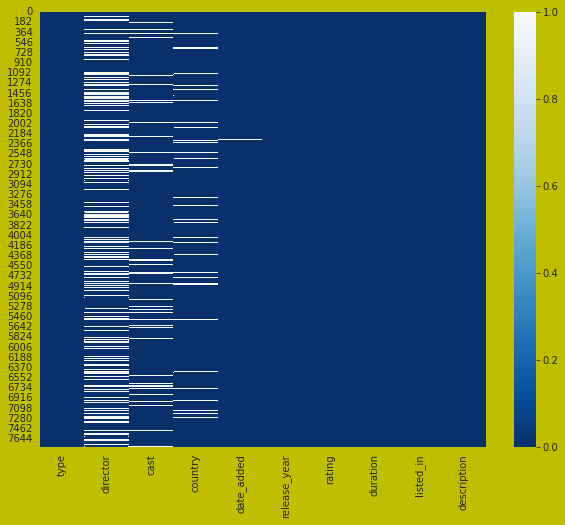

In [346]:
# Visualizing the distribution of  missing values in the dataset
plt.figure(figsize = (10,8), facecolor = 'y')
ax = plt.gca()
sns.heatmap(df.isnull(), cmap = 'Blues_r', ax =ax,  linecolor = 'r')
plt.show()

In [347]:
# filling the missing values in director, cast and country column
df['director'] =df.director.fillna('None')
df['cast'] =  df['cast'].fillna('not available')
df['country'] = df['country'].fillna('missing')

In [348]:
# checking for the missing values after imputing values in above columns
df.isnull().sum()

type             0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [349]:
# dropping date_added and rating rows where values are missing
df = df.dropna(axis =0, subset = ['date_added', 'rating'] )
df['date_added'].isnull().sum()


0

In [350]:
df.isnull().sum()

type            0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [351]:
# defining a function to get the year addedfrom the date_added
def func_1(x):
  return x.split()[0]

In [352]:
# Getting the year added column by applying above function
df['month_added'] = df['date_added'].apply(func_1)
df['year_added']  = df['date_added'].apply(lambda x : x.split()[-1])
df.drop('date_added', axis =1)

,type,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,TV Show,None,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020
1,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020
...,...,...,...,...,...,...,...,...,...,...,...
7782,Movie,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,October,2020
7783,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,March,2019
7784,Movie,None,Nasty C,missing,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",September,2020
7785,TV Show,None,"Adriano Zumbo, Rachel Khoo",Australia,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,October,2020


In [353]:
# checking the head of the dataset
df.head()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,TV Show,None,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020
1,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020


## EDA 

In [354]:
# defining two sub-datasets based on type of the content
shows_df = df[df['type'] == 'TV Show']
movie_df  = df[df['type']== 'Movie']


In [355]:
# creating a column n movie_df dataframe using func_1 funtion
movie_df['duration'] = movie_df['duration'].apply(func_1)

In [356]:
movie_df

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
1,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,January,2020
6,Movie,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",June,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,Movie,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020
7782,Movie,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,October,2020
7783,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,March,2019
7784,Movie,None,Nasty C,missing,"September 25, 2020",2019,TV-MA,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",September,2020


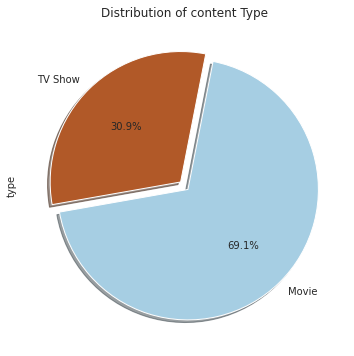

In [357]:
# plotting the type distribution
sns.set_style('darkgrid')


plt.figure(figsize = (8,6))
df['type'].value_counts().plot.pie(autopct="%1.1f%%", cmap = 'Paired', shadow=True, startangle=190,explode=(0.04,0.04));
plt.title('Distribution of content Type')
plt.show()


In [358]:
# getting top 15 countries based on content type


# creating a  TV shows dataset where imputed values are not taking into account
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_df = tv_shows_df[tv_shows_df['country'] != 'missing']

# creating a  movies dataset where imputed values are not taking into account
movies_df  = df[df['type']== 'Movie']
movies_df = movies_df[movies_df['country'] != 'missing']


# getting unique values shows dataframe
country_df_shows = pd.DataFrame(tv_shows_df['country'].str.split(', ', expand= True).stack().reset_index(level =1, drop = True).value_counts()).reset_index()
country_df_shows.rename(columns = {'index': 'country', 0:'shows counts'}, inplace =True)
top_15_countries = country_df_shows.head(15)

# getting unique values shows dataframe fir movies
country_df_movies = pd.DataFrame(movies_df['country'].str.split(', ', expand= True).stack().reset_index(level =1, drop = True).value_counts()).reset_index()
country_df_movies.rename(columns = {'index': 'country', 0:'movies counts'}, inplace =True)
top_15_countries_movies = country_df_movies.head(15)
new_df = pd.concat([top_15_countries, top_15_countries_movies] , axis =1)

# final dataframe
new_df





,country,shows counts,country,movies counts
0,United States,860,United States,2427
1,United Kingdom,255,India,915
2,Japan,182,United Kingdom,466
3,South Korea,157,Canada,286
4,Canada,126,France,265
5,France,84,Spain,158
6,India,75,Germany,157
7,Taiwan,70,Japan,103
8,Australia,58,China,102
9,Spain,57,Mexico,101


In [359]:
# top 10 directors who have directed most move
director_df  =  df[df['director'] != 'None']
director_df = pd.DataFrame(director_df['director'].value_counts().head(10)).reset_index()
director_df.rename(columns = {'index' : 'director', 'director' : 'counts'}, inplace= True)
director_df



,director,counts
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12
5,Youssef Chahine,12
6,Martin Scorsese,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Hakan Algül,8


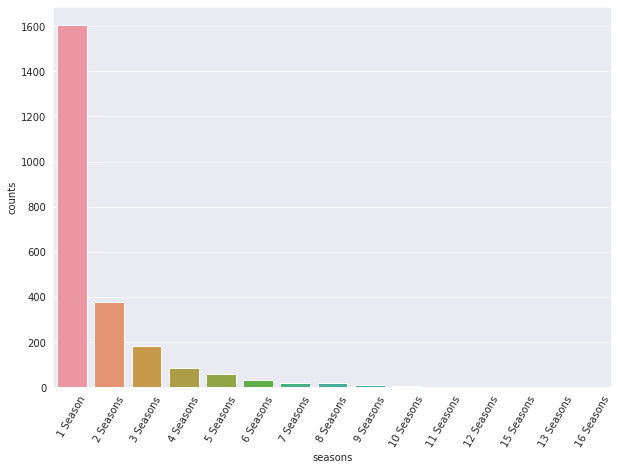

,seasons,counts
0,1 Season,1606
1,2 Seasons,378
2,3 Seasons,183
3,4 Seasons,86
4,5 Seasons,57
5,6 Seasons,30
6,7 Seasons,19
7,8 Seasons,18
8,9 Seasons,8
9,10 Seasons,5


In [360]:
# plotting seasons distribution for TV shows

plt.figure(figsize = (10,7))


seasons_df = pd.DataFrame(shows_df['duration'].value_counts()).reset_index()
seasons_df.rename(columns = {'index': 'seasons', 'duration': 'counts'}, inplace = True)
sns.barplot(data =seasons_df, x= 'seasons', y= 'counts')
plt.xticks(rotation = 60)
plt.show()


seasons_df

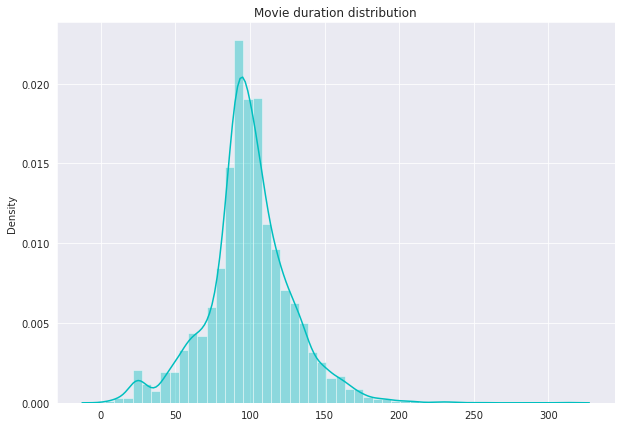

In [361]:
plt.figure(figsize = (10,7))
ax = plt.gca()
sns.distplot( x= movie_df['duration'], ax = ax, color = 'c')
plt.title('Movie duration distribution')
plt.show()


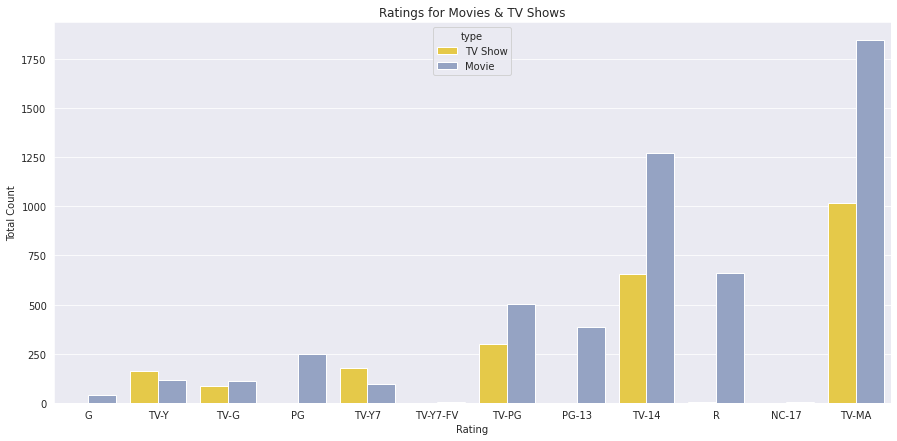

In [362]:
# visualizing the distribution of various ratings
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(df.rating, hue=df.type, order=order, palette='Set2_r');
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

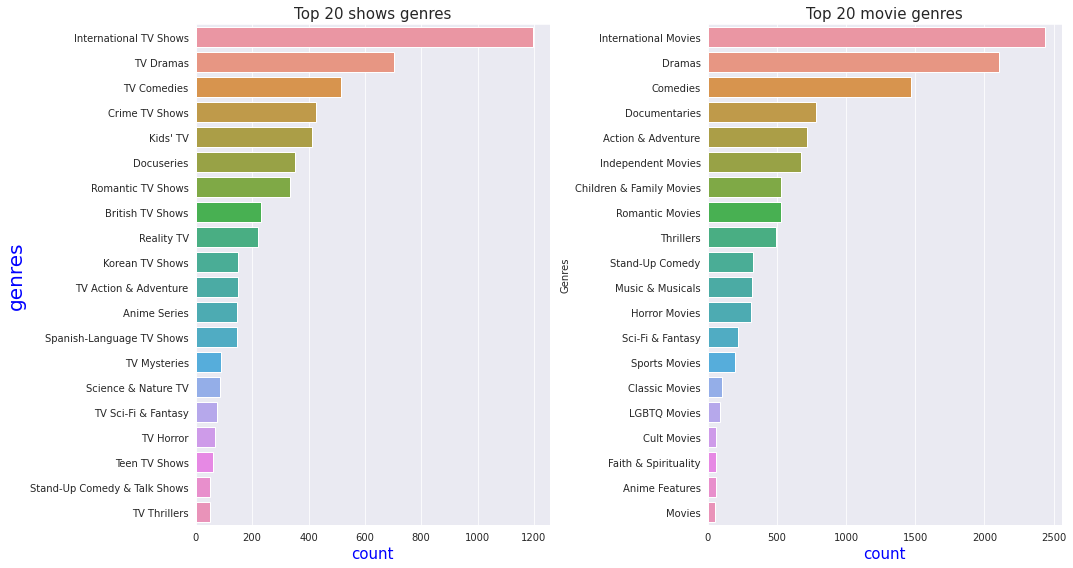

In [363]:
# finding top 20 movie genres in movies and TV shows
genres_shows = shows_df.listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_movies = movie_df.listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)


fig , axes = plt.subplots(1,2, figsize = (15,8))

sns.countplot(y = genres_shows, order=genres_shows.value_counts().index[:20], ax= axes[0])
sns.countplot(y = genres_movies, order=genres_movies.value_counts().index[:20], ax= axes[1])

axes[0].set_xlabel('count', fontsize = 15, c='b')
axes[1].set_xlabel('count', fontsize = 15, c='b')
axes[0].set_ylabel('genres', fontsize = 20, c = 'b')
axes[0].set_title('Top 20 shows genres', fontsize = 15)
axes[1].set_title('Top 20 movie genres', fontsize = 15 )




# plt.figure(figsize=(7,9))
# g = sns.countplot(y = genres_shows, order=genres_shows.value_counts().index[:20])

# plt.xlabel('Titles')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

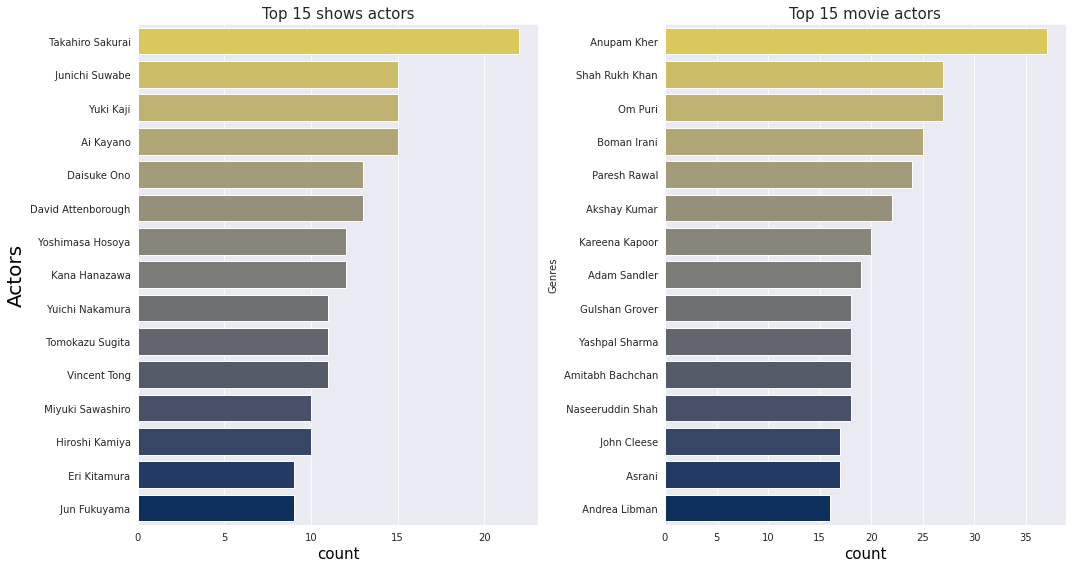

In [364]:
# finding the top actors who worked in most content in movies and TV shows
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_actors = tv_shows_df[tv_shows_df['cast'] != 'not available']

movies_df  = df[df['type']== 'Movie']
movie_actors = movies_df[movies_df['cast'] != 'not available']




top_shows_actors =  tv_shows_actors.cast.str.split(',', expand= True).stack().reset_index(level =1, drop = True)
top_movie_actors =  movie_actors.cast.str.split(',', expand= True).stack().reset_index(level =1, drop = True)



fig , axes = plt.subplots(1,2, figsize = (15,8))

sns.countplot(y = top_shows_actors, order=top_shows_actors.value_counts().index[:15], ax= axes[0], palette ='cividis_r')
sns.countplot(y = top_movie_actors, order=top_movie_actors.value_counts().index[:15], ax= axes[1], palette = 'cividis_r')

axes[0].set_xlabel('count', fontsize = 15, c='black')
axes[1].set_xlabel('count', fontsize = 15, c='black')
axes[0].set_ylabel('Actors', fontsize = 20, c = 'black')
axes[0].set_title('Top 15 shows actors', fontsize = 15)
axes[1].set_title('Top 15 movie actors', fontsize = 15 )

plt.ylabel('Genres')
plt.tight_layout()
plt.show()

<Figure size 864x504 with 0 Axes>

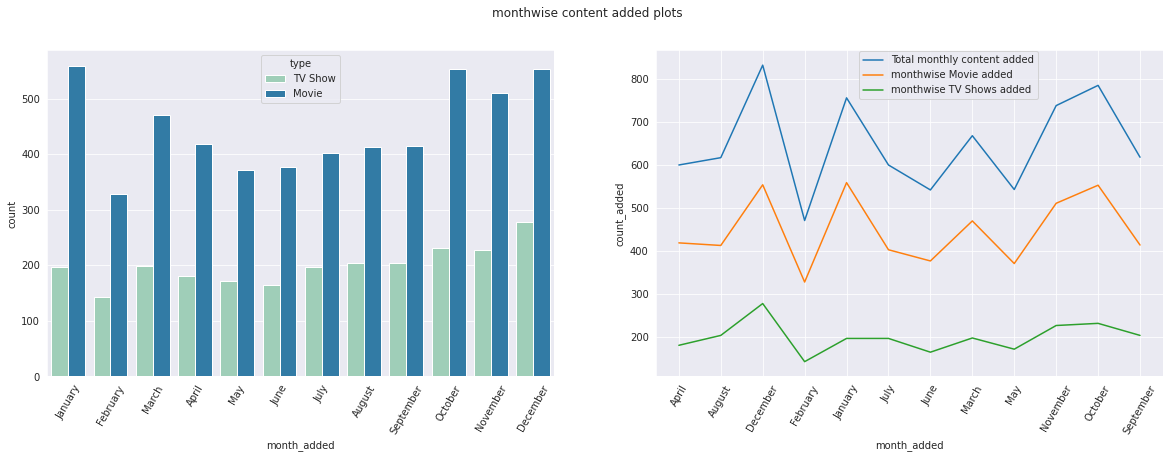

In [365]:
# month wise content distribution
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']



# month wise content distribution in entire dataset
month_added_df = pd.DataFrame(df['month_added'].value_counts()).reset_index().sort_values('index')
month_added_df.rename(columns = {'index' : 'month_added', 'month_added': 'count_added'}, inplace = True)

# month wise content distribution in movies dataset
movies_added_month =  pd.DataFrame(movie_df['month_added'].value_counts()).reset_index().sort_values('index')
movies_added_month.rename(columns = {'index' : 'month_added', 'month_added': 'count_added'}, inplace = True)

# month wise content distribution in TV shows dataset
shows_added_month =  pd.DataFrame(shows_df['month_added'].value_counts()).reset_index().sort_values('index')
shows_added_month.rename(columns = {'index' : 'month_added', 'month_added': 'count_added'}, inplace = True)



# plotting the results of movies and TV shows in  count plot
plt.figure(figsize = (12,7))
fig, axes =  plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
sns.countplot(data = df , x = 'month_added', hue = 'type', order = month_list, palette = 'YlGnBu', ax = axes[0])
axes[0].set_xticklabels(labels =month_list, rotation = 60)



# plotting the distribution of entire content added in line plot
sns.lineplot(data= month_added_df, x='month_added',  y='count_added' , ax = axes[1])

# plotting the distribution of movie content added in line plot
sns.lineplot(data= movies_added_month, x='month_added',  y='count_added' , ax = axes[1])

# plotting the distribution of TV Show content added in line plot
sns.lineplot(data= shows_added_month, x='month_added',  y='count_added', ax = axes[1] )

plt.legend(['Total monthly content added','monthwise Movie added','monthwise TV Shows added'], loc = (0.4,0.85))
plt.xticks(rotation = 60)


plt.suptitle('monthwise content added plots')
plt.show()




In [366]:
# year wise content distribution

# year wise content distribution in entire dataset
year_df = pd.DataFrame(df['year_added'].value_counts()).reset_index().sort_values('index')
year_df.rename(columns = {'index' : 'year_added', 'year_added': 'count_added'}, inplace = True)

# year wise content distribution in movies dataset
movies_added =  pd.DataFrame(movie_df['year_added'].value_counts()).reset_index().sort_values('index')
movies_added.rename(columns = {'index' : 'year_added', 'year_added': 'count_added'}, inplace = True)

# year wise content distribution in TV shows dataset
shows_added =  pd.DataFrame(shows_df['year_added'].value_counts()).reset_index().sort_values('index')
shows_added.rename(columns = {'index' : 'year_added', 'year_added': 'count_added'}, inplace = True)






<Figure size 864x720 with 0 Axes>

<Figure size 864x504 with 0 Axes>

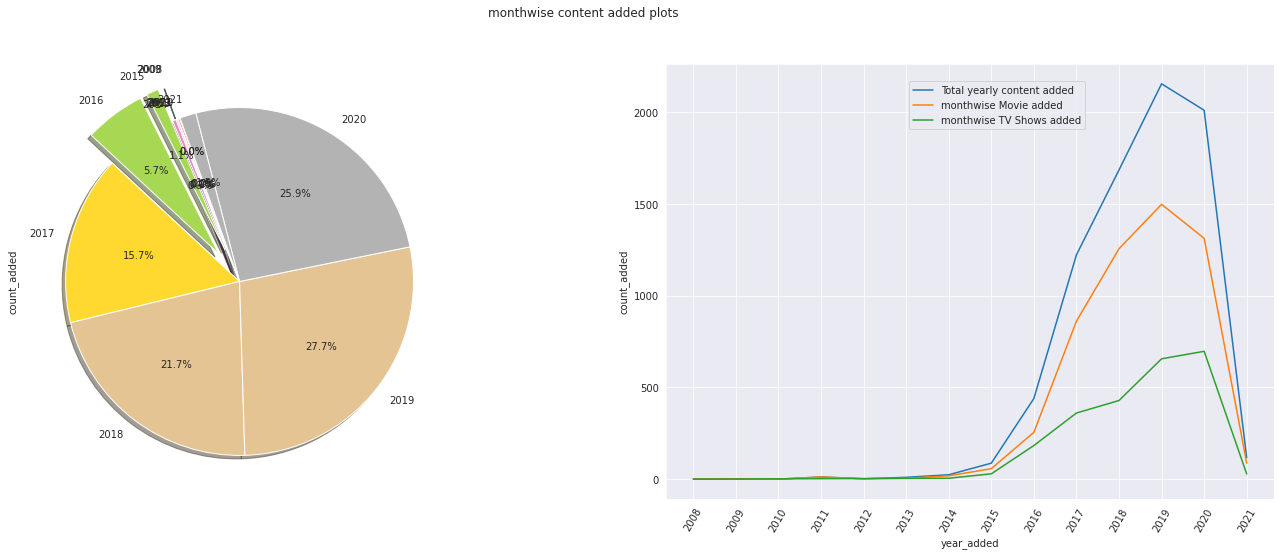

In [367]:
#plotting the results
plt.figure(figsize = (12,10))



# plotting pie plot for yearly content added by Netflix on the platform
year_list = range(2008,2022)
explode_list = (0.2,0.2,0,0,0,0,0, 0.2, 0.2,0,0,0,0,0)


plt.figure(figsize = (12,7))
fig, axes =  plt.subplots(nrows = 1, ncols = 2, figsize = (24,8))
year_df['count_added'].plot.pie(autopct="%1.1f%%", cmap = 'Set2', shadow=True, startangle=110, ax= axes[0], explode = explode_list,labels =year_list)
axes[0].set_xticklabels(labels =year_list, rotation = 60)



# plotting the distribution of entire content added in line plot
sns.lineplot(data= year_df, x='year_added',  y='count_added' , ax = axes[1])

# plotting the distribution of movie content added in line plot
sns.lineplot(data= movies_added, x='year_added',  y='count_added' , ax = axes[1])

# plotting the distribution of TV content added in line plot
sns.lineplot(data= shows_added, x='year_added',  y='count_added', ax = axes[1] )

plt.legend(['Total yearly content added','monthwise Movie added','monthwise TV Shows added'], loc = (0.4,0.85))
plt.xticks(rotation = 60)


plt.suptitle('monthwise content added plots')
plt.show()



In [368]:
tv_shows_df.columns

Index(['type', 'director', 'cast', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'month_added',
       'year_added'],
      dtype='object')

### Outlier detection in different columns

depending on the nature of columns and values of these columns most of the columns content a lot unique values hence we cannot detect outliers however we check for the outliers in country and duration column if exist.

In [369]:
# checking for the outliers in countries column
df_a = pd.DataFrame(df['country'].value_counts())
df_a[df_a['country'] == 1]


# basis on this data we cannot find outlier rows in country column

,country
"South Africa, Angola",1
"United States, United Kingdom, Spain, South Korea",1
"Canada, Mexico, Germany, South Africa",1
"Hong Kong, Taiwan",1
"United Kingdom, United States, Canada",1
...,...
"Russia, United States, China",1
"Italy, Switzerland, France, Germany",1
"United States, United Kingdom, Canada",1
"United States, United Kingdom, Japan",1


## outliers in duration
since we have two content types (TV shows and movies ) and the values are different in both these types hence we will perform these tasks saperately in two individudal dataframes. i.e shows_df & movie_df

In [370]:
# detecting outlier detection in shows_df as in this dataframe duration columns contains categorical values i.e seasons

# cheking for the percent distribution in duraion column of shows_df


shows_df['duration'].value_counts(normalize =True)*100

shows_duration = pd.DataFrame(shows_df['duration'].value_counts()).reset_index().rename(columns = {'index' : 'season', 'duration': 'counts'})
shows_duration['percent_occupied'] = shows_duration['counts']/len(shows_df)*100
shows_duration
# based on this result we can assume that there are less than 1 percent shows which are 7 seasons or long hence we can consider these seasons as outliers
# however we will be removing content which has more than 10 seasons

,season,counts,percent_occupied
0,1 Season,1606,66.972477
1,2 Seasons,378,15.763136
2,3 Seasons,183,7.631359
3,4 Seasons,86,3.586322
4,5 Seasons,57,2.376981
5,6 Seasons,30,1.251043
6,7 Seasons,19,0.792327
7,8 Seasons,18,0.750626
8,9 Seasons,8,0.333611
9,10 Seasons,5,0.208507


In [371]:
# checking shape before outlier removal
shows_df.shape

(2398, 12)

In [372]:
# new shows_df after removing shows having more than 10 seasons
list_1 = ['11 Seasons', '12 Seasons', '15 Seasons', '13 Seasons','16 Seasons']

shows_df_updated = shows_df[shows_df['duration'] != '11 Seasons'  ]
shows_df_updated = shows_df_updated[shows_df['duration'] != '12 Seasons'  ]
shows_df_updated = shows_df_updated[shows_df['duration'] != '13 Seasons'  ]
shows_df_updated = shows_df_updated[shows_df['duration'] != '14 Seasons'  ]
shows_df_updated = shows_df_updated[shows_df['duration'] != '15 Seasons'  ]
shows_df_updated = shows_df_updated[shows_df['duration'] != '16 Seasons'  ]
shows_df_updated['duration'].value_counts(normalize =True)*100

1 Season      67.196653
2 Seasons     15.815900
3 Seasons      7.656904
4 Seasons      3.598326
5 Seasons      2.384937
6 Seasons      1.255230
7 Seasons      0.794979
8 Seasons      0.753138
9 Seasons      0.334728
10 Seasons     0.209205
Name: duration, dtype: float64

In [373]:
## checking shape after outlier removal
shows_df_updated.shape

(2390, 12)

outlier detection in duration column of  movie_df 

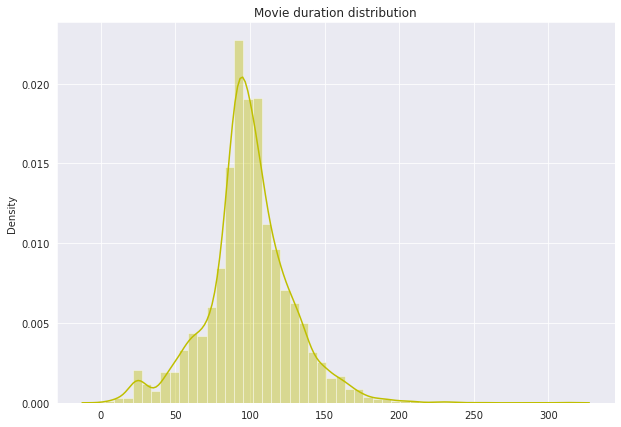

In [374]:
# we will be using isllation forest technique to detect outlier in duration column of movies_df

# first let see distribution of movies again 

plt.figure(figsize = (10,7))
ax = plt.gca()
sns.distplot( x= movie_df['duration'], ax = ax, color = 'y')
plt.title('Movie duration distribution')
plt.show()


In [375]:
# cheking shape of movie_df before oulier removal
movie_df.shape

(5372, 12)

By looking at the distribution we can cap ouliers by 4% when using isolationforest

In [376]:
# importing isolationForest
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators = 100, contamination = 0.04)
isolation_forest.fit(movie_df['duration'].values.reshape(-1,1))
movie_df['anomaly_score'] = isolation_forest.decision_function(movie_df['duration'].values.reshape(-1,1))
movie_df['-1 if outlier'] = isolation_forest.predict(movie_df['duration'].values.reshape(-1,1))

# printing head of the dataset
movie_df.sort_values('anomaly_score').head()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,anomaly_score,-1 if outlier
957,Movie,None,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",December,2018,-0.137177,-1
6850,Movie,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,TV-14,253,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,May,2020,-0.135569,-1
4490,Movie,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979,TV-14,237,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,May,2020,-0.133431,-1
3694,Movie,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",missing,"May 21, 2020",1982,TV-PG,233,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...,May,2020,-0.130766,-1
5108,Movie,Hussein Kamal,"Suhair El-Babili, Shadia, Abdel Moneim Madboul...",missing,"May 21, 2020",1984,TV-14,230,"Comedies, Dramas, International Movies",When robberies and murders targeting women swe...,May,2020,-0.130766,-1


In [377]:
# creating a new dataframe with no outliers
movie_df = movie_df[movie_df['-1 if outlier'] == 1]
movie_df_updated = movie_df.drop(['anomaly_score', '-1 if outlier'], axis = 1)
movie_df_updated.head()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
1,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,January,2020
6,Movie,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",June,2020


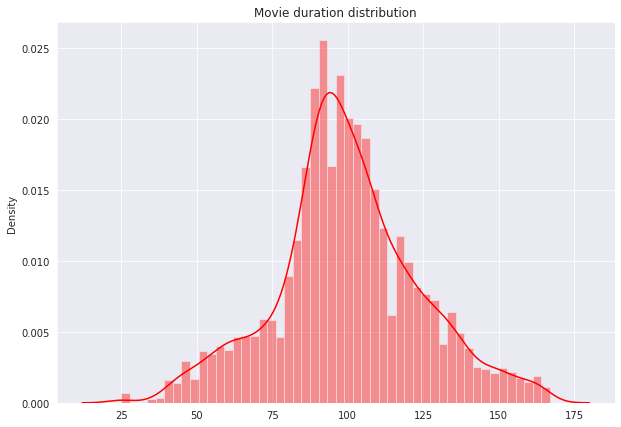

In [383]:
# let's see what changes we have made in the distribution

# first let see distribution of movies again 

plt.figure(figsize = (10,7))
ax = plt.gca()
sns.distplot( x= movie_df_updated['duration'], ax = ax, color = 'r', bins = 50)
plt.title('Movie duration distribution')
plt.show()


In [378]:
# cheking shape of movie_df after outlier removal
movie_df_updated.shape

(5162, 12)

In [386]:
# consolidated dataset 
updated_dataset = pd.concat([shows_df_updated, movie_df_updated], axis = 0)
updated_dataset.head()


,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,TV Show,None,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020
5,TV Show,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,July,2017
11,TV Show,None,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",November,2018
12,TV Show,Diego Enrique Osorno,not available,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,May,2019
16,TV Show,None,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",missing,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",March,2019
